In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print('Samples:' ,df.shape[0])
print('Features:' ,df.shape[1])

Samples: 1470
Features: 35


### Data Cleaning

In [5]:
# Removal of obviously useless features
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [6]:
print('Features:' ,df.shape[1])

Features: 31


In [7]:
y = df['Attrition']
X = df.drop(['Attrition'], axis=1)

In [8]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [81]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [10]:
y = le.fit_transform(y)

In [11]:
y.shape

(1470, 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

In [13]:
# inspect string based features
df.select_dtypes(['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
5,No,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
6,No,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Yes
7,No,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,No
8,No,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,No
9,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No


In [14]:
# optimize with for loop
# one hot encoding
ind_BusinessTravel = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')
ind_Department = pd.get_dummies(df['Department'], prefix='Department')
ind_EducationField = pd.get_dummies(df['EducationField'], prefix='EducationField')
ind_Gender = pd.get_dummies(df['Gender'], prefix='Gender')
ind_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole')
ind_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
ind_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime')

In [15]:
ind_Department.head()

,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [16]:
# combines dummied categorical data with numeric data from original dataframe
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender,
                ind_JobRole, ind_MaritalStatus, ind_OverTime, 
                df.select_dtypes(['int64'])], axis=1)

In [17]:
df1.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,...,3,1,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,0,1,0,0,...,4,4,1,10,3,3,10,7,1,7
2,0,0,1,0,1,0,0,0,0,0,...,3,2,0,7,3,3,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,...,3,3,0,8,3,3,8,7,3,0
4,0,0,1,0,1,0,0,0,0,1,...,3,4,1,6,3,3,2,2,2,2


In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [49]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''Print scoring metrics for classifier on training data'''
    if train:
        print("Train Result:\n")
        print("Accuracy score: {0:.4f}".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report:\n {}".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix:\n {} \n".format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t {0:.4f}".format(np.std(res)))
        
      
    elif train == False:
        '''Print scoring metrics for classifier on test data'''  
        
        print("Test Result:\n")
        print("Accuracy score: {0:.4f}".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report:\n {}".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix:\n {} \n".format(confusion_matrix(y_test, clf.predict(X_test))))

## Decision Tree

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.25)

In [43]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = DecisionTreeClassifier(random_state=42)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [51]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 1.0000
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       930
          1       1.00      1.00      1.00       172

avg / total       1.00      1.00      1.00      1102

Confusion Matrix:
 [[930   0]
 [  0 172]] 

Average accuracy: 	 0.8013
Accuracy SD: 	 0.0235


In [52]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.8397
Classification Report:
              precision    recall  f1-score   support

          0       0.85      0.97      0.91       303
          1       0.62      0.23      0.34        65

avg / total       0.81      0.84      0.81       368

Confusion Matrix:
 [[294   9]
 [ 50  15]] 



## Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier

In [44]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                           bootstrap=True, n_jobs=-1, random_state=42)

In [45]:
bag_clf.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [46]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 1.0000
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       930
          1       1.00      1.00      1.00       172

avg / total       1.00      1.00      1.00      1102

Confusion Matrix:
 [[930   0]
 [  0 172]] 

Average accuracy: 	 0.8639
Accuracy SD: 	 0.0119


In [50]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.8397
Classification Report:
              precision    recall  f1-score   support

          0       0.85      0.97      0.91       303
          1       0.62      0.23      0.34        65

avg / total       0.81      0.84      0.81       368

Confusion Matrix:
 [[294   9]
 [ 50  15]] 



## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf_clf = RandomForestClassifier(random_state=42)

In [55]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [57]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.9864
Classification Report:
              precision    recall  f1-score   support

          0       0.98      1.00      0.99       930
          1       1.00      0.91      0.95       172

avg / total       0.99      0.99      0.99      1102

Confusion Matrix:
 [[930   0]
 [ 15 157]] 

Average accuracy: 	 0.8548
Accuracy SD: 	 0.0138


In [58]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.8234
Classification Report:
              precision    recall  f1-score   support

          0       0.83      0.98      0.90       303
          1       0.50      0.09      0.16        65

avg / total       0.78      0.82      0.77       368

Confusion Matrix:
 [[297   6]
 [ 59   6]] 



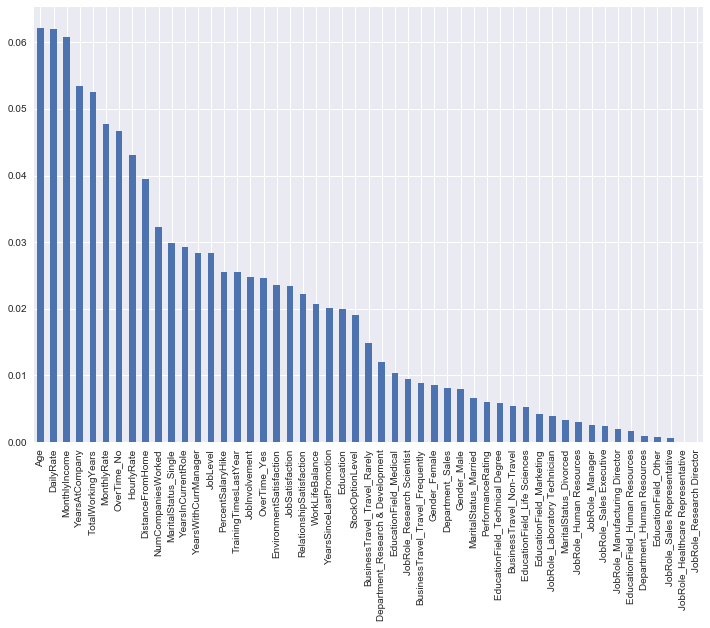

In [62]:
pd.Series(rf_clf.feature_importances_,
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar'
                                                                  , figsize=(12,8))

## AdaBoost

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
ada_clf = AdaBoostClassifier(random_state=42)

In [65]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)

In [67]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.9147
Classification Report:
              precision    recall  f1-score   support

          0       0.92      0.98      0.95       930
          1       0.86      0.54      0.66       172

avg / total       0.91      0.91      0.91      1102

Confusion Matrix:
 [[915  15]
 [ 79  93]] 

Average accuracy: 	 0.8775
Accuracy SD: 	 0.0216


In [68]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.8696
Classification Report:
              precision    recall  f1-score   support

          0       0.88      0.98      0.93       303
          1       0.77      0.37      0.50        65

avg / total       0.86      0.87      0.85       368

Confusion Matrix:
 [[296   7]
 [ 41  24]] 



## Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gbc_clf = GradientBoostingClassifier()

In [72]:
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [73]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.9147
Classification Report:
              precision    recall  f1-score   support

          0       0.92      0.98      0.95       930
          1       0.86      0.54      0.66       172

avg / total       0.91      0.91      0.91      1102

Confusion Matrix:
 [[915  15]
 [ 79  93]] 

Average accuracy: 	 0.8775
Accuracy SD: 	 0.0216


In [74]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.8696
Classification Report:
              precision    recall  f1-score   support

          0       0.88      0.98      0.93       303
          1       0.77      0.37      0.50        65

avg / total       0.86      0.87      0.85       368

Confusion Matrix:
 [[296   7]
 [ 41  24]] 



## XGBoost

In [76]:
import xgboost as xgb

In [77]:
xgb_clf = xgb.XGBClassifier()

In [78]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [79]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.9483
Classification Report:
              precision    recall  f1-score   support

          0       0.94      1.00      0.97       930
          1       0.98      0.68      0.80       172

avg / total       0.95      0.95      0.94      1102

Confusion Matrix:
 [[928   2]
 [ 55 117]] 

Average accuracy: 	 0.8766
Accuracy SD: 	 0.0169


In [80]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.8397
Classification Report:
              precision    recall  f1-score   support

          0       0.85      0.97      0.91       303
          1       0.64      0.22      0.32        65

avg / total       0.81      0.84      0.81       368

Confusion Matrix:
 [[295   8]
 [ 51  14]] 



The data is severly imbalanced. Recall scores are fairly atrocious across all models.